In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice
import datetime as datetime
import glob
from matplotlib import pyplot
import pycountry
import plotly.express as px
import psutil
from IPython.display import Image

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

#import warnings
#warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
eci = pd.read_csv('Entrenamieto_ECI_2020.csv')

In [3]:
#Dado que casi todos los estados de las oportunidades son ganado y perdido, para este analisis solo vamos a utilizar
#estas oportunidades. Con ello, al saber cualquier porcentaje de oportunidades ganadas, también vamos a conocer el
#porcentaje de perdidas (100%-porcentaje de ganadas)
eciWon = eci[(eci.Stage=='Closed Won')|(eci.Stage=='Closed Lost')]

In [4]:
eciWon['ganada'] = eciWon['Stage'].apply(lambda x: 1 if x=='Closed Won' else 0)

/home/german/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
def cambiar_nombre(nombre):
    switcher = {
        'China (PRC)': 'China',
        'South Korea': 'Korea, Republic of',
        'KSA': 'Saudi Arabia',
        'Vietnam': 'Viet Nam',
        'Taiwan': 'Taiwan, Province of China',
        'UAE (Dubai)': 'United Arab Emirates',
        'NW America': 'United States',
        'Central US': 'United States',
        'SE America': 'United States',
        'NE America': 'United States',
        'SW America': 'United States',
    }
    return switcher.get(nombre,nombre)

In [6]:
eciWon['Territory'] = eciWon['Territory'].apply(lambda x: cambiar_nombre(x))

/home/german/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
territoryGroup = eciWon.groupby(['Territory']).agg({'ganada':['sum','count']}).reset_index()
territoryGroup.columns = ['Territory','cantidad de won','total']
territoryGroup

,Territory,cantidad de won,total
0,Albania,0,2
1,Armenia,0,2
2,Australia,696,1202
3,Austria,124,145
4,Belarus,0,4
...,...,...,...
65,Ukraine,0,5
66,United Arab Emirates,2,28
67,United Kingdom,122,313
68,United States,1569,3269


In [8]:
#Sacamos los territorios que aparcen muy pocas veces para no caer en "la ecuacion mas peligrosa de la historia"
territoryGroup = territoryGroup[territoryGroup['total']>10]

In [9]:
territoryGroup['Porcentaje de oportunidades ganadas'] = territoryGroup['cantidad de won']/territoryGroup['total']*100
territoryGroup.sort_values('Porcentaje de oportunidades ganadas',ascending=False,inplace=True)

/home/german/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/german/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


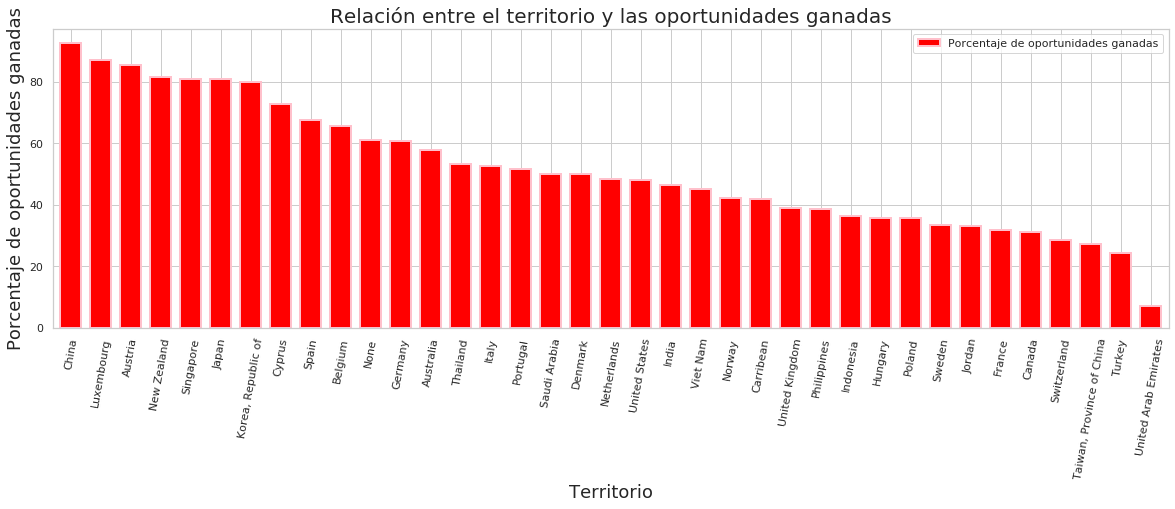

In [10]:
territoryGroup.plot(kind='bar', x='Territory', y='Porcentaje de oportunidades ganadas',\
                 width=0.7, figsize=(20,5.5), color='red',\
                 edgecolor="pink", linewidth=2,rot=80)
g=plt.gca()
g.set_title("Relación entre el territorio y las oportunidades ganadas",\
            fontsize=20);
g.set_xlabel("Territorio", fontsize=18);
g.set_ylabel("Porcentaje de oportunidades ganadas", fontsize=18);

In [11]:
#Gráfico alternativo con el mapa del mundo

In [12]:
def get_alpha_3(location):
    try:
        return pycountry.countries.get(name=location).alpha_3
    except:
        return 'Desconocido'

In [13]:
territoryGroup['Code'] = territoryGroup['Territory'].apply(lambda x: get_alpha_3(x))

/home/german/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


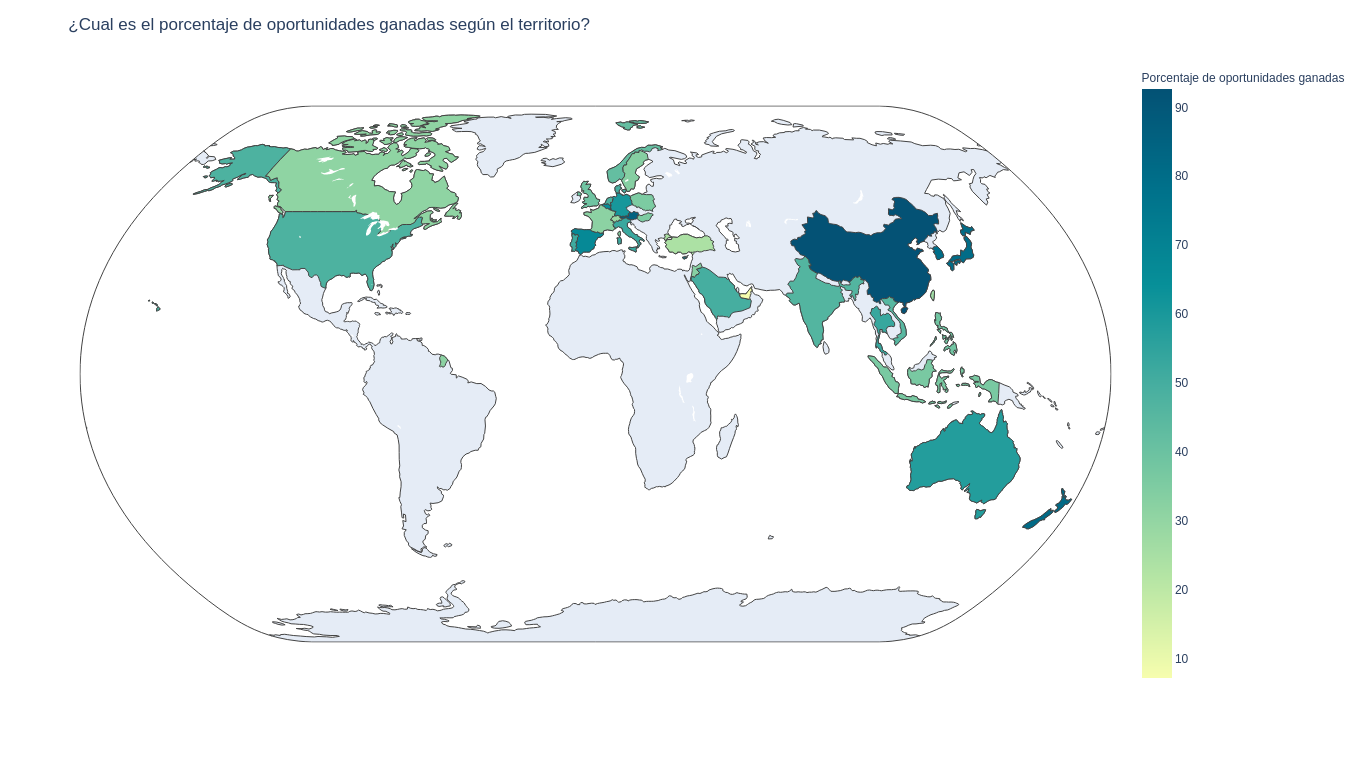

In [14]:
fig = px.choropleth(territoryGroup,locations='Code',color='Porcentaje de oportunidades ganadas',\
                    color_continuous_scale=px.colors.sequential.Bluyl,hover_name='Territory',)
fig.update_layout(
    title_text = '¿Cual es el porcentaje de oportunidades ganadas según el territorio?'
)
fig.update_geos(projection_type="natural earth")
#fig.show()
fig.write_image("visu.png",width=1366,height= 768)
Image("visu.png")